In [204]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

import gc
import nibabel as nib
import numpy as np
import  matplotlib.pyplot as plt


dir_mri = './/files//subj01_mri.nii.gz'
dir_pet = './/files//subj01_pet.nii.gz'

mri_file = nib.load(dir_mri)
pet_file = nib.load(dir_pet)

data_mri = mri_file.get_fdata()
data_pet = pet_file.get_fdata()

print("MRI_img shape:", data_mri.shape)
print("PET_img shape:", data_pet.shape)

MRI_img shape: (512, 512, 284)
PET_img shape: (512, 512, 284)


In [205]:
print(np.amax(data_pet))

62731.2109375


In [206]:
IMG_ROWS = 512
IMG_COLS = 512
IDX_SLICE = 142

# FA_NORM = np.amax(data_pet[:, :, IDX_SLICE])
FA_NORM = 63000
print(FA_NORM)

mri_th = 0.483

X = np.zeros((1, IMG_ROWS, IMG_COLS, 5))
Z = np.zeros((1, IMG_ROWS, IMG_COLS, 4))

data_pet[:, :, IDX_SLICE] = np.divide(data_pet[:, :, IDX_SLICE], FA_NORM)

Z[0, :, :, 0] = data_pet[:, :, IDX_SLICE] <= mri_th # threshold mask
Z[0, :, :, 1] = data_mri[:, :, IDX_SLICE] == 3 # white mask
Z[0, :, :, 2] = data_mri[:, :, IDX_SLICE] != 0 # brain mask
Z[0, :, :, 2] = Z[0, :, :, 2].astype(bool).astype(int) # brain mask
Z[0, :, :, 3] = data_pet[:, :, IDX_SLICE] > mri_th # threshold mask

X[0, :, :, 0] = data_pet[:, :, IDX_SLICE] * Z[0, :, :, 2]  # PET
X[0, :, :, 1] = data_mri[:, :, IDX_SLICE] == 1  # CSF
X[0, :, :, 2] = data_mri[:, :, IDX_SLICE] == 2 # gray matter
X[0, :, :, 3] = Z[0, :, :, 0]*Z[0, :, :, 1]  # white matter
X[0, :, :, 2] = (Z[0, :, :, 3] + X[0, :, :, 2]).astype(bool).astype(int)

del Z
gc.collect()

print(X.shape)

63000
(1, 512, 512, 5)


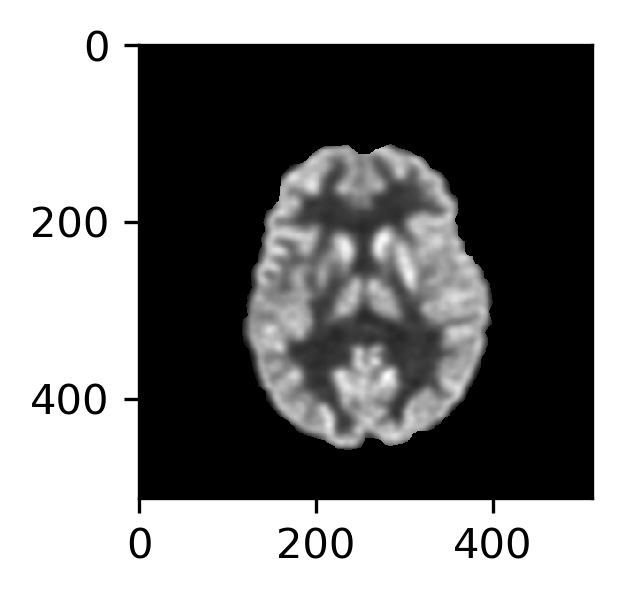

In [207]:
plt.figure(figsize=(2,2), dpi=300)
plt.imshow(np.rot90(X[0, :, :, 0]), cmap='gray')

float64


(array([ 121.,  124.,  117.,  125.,  133.,  113.,   93.,  105.,  113.,
         100.,  103.,   96.,  127.,  125.,  159.,  184.,  211.,  247.,
         298.,  316.,  391.,  435.,  465.,  559.,  572.,  622.,  702.,
         764.,  797.,  852.,  881., 1361., 1657., 1854., 2084., 2084.,
        2196., 2260., 2235., 1997., 1987., 2075., 1887., 1637., 1523.,
        1271.,  978.,  863.,  706.,  598.,  404.,  325.,  250.,  231.,
         176.,  129.,   86.,   78.,   61.,   56.,   54.,   27.,   11.,
           8.]),
 array([0.13154793, 0.14271667, 0.15388541, 0.16505414, 0.17622288,
        0.18739162, 0.19856036, 0.20972909, 0.22089783, 0.23206657,
        0.24323531, 0.25440405, 0.26557278, 0.27674152, 0.28791026,
        0.299079  , 0.31024774, 0.32141647, 0.33258521, 0.34375395,
        0.35492269, 0.36609143, 0.37726016, 0.3884289 , 0.39959764,
        0.41076638, 0.42193512, 0.43310385, 0.44427259, 0.45544133,
        0.46661007, 0.47777881, 0.48894754, 0.50011628, 0.51128502,
        0.

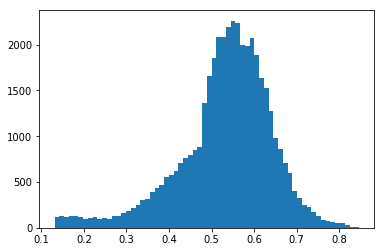

In [208]:
data_plot = np.squeeze(X[0, :, :, 0]*X[0, :, :, 2])
print(data_plot.dtype)
data_plot = data_plot[data_plot > 0]
plt.hist(np.ravel(data_plot), bins=64)

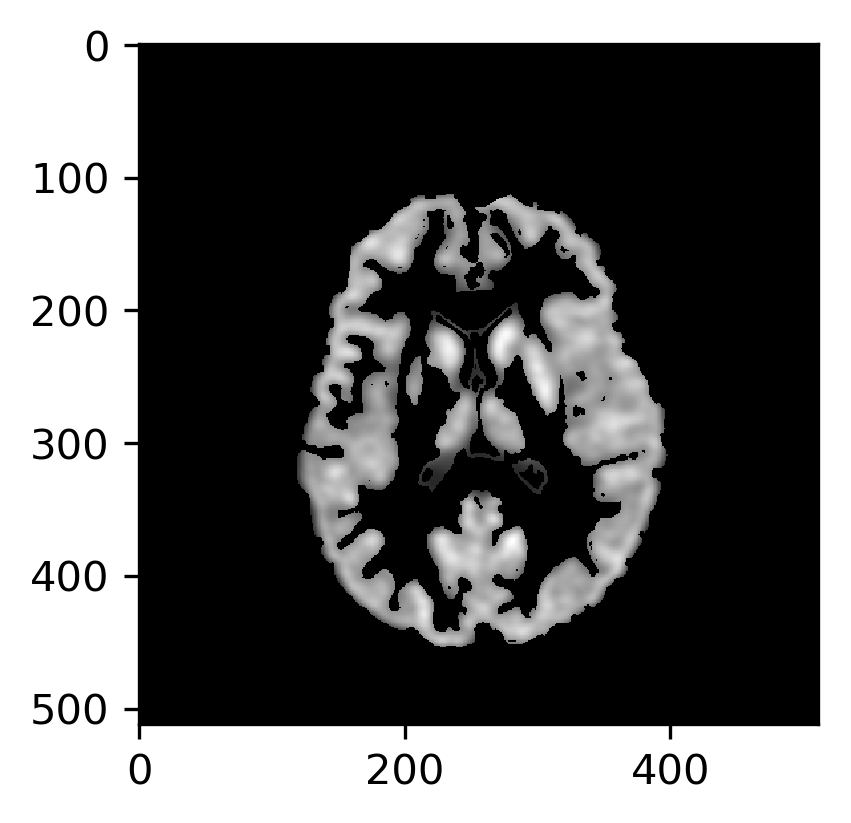

In [209]:
plt.figure(figsize=(3,3), dpi=300)
plt.imshow(np.rot90(X[0, :, :, 0]*X[0, :, :, 2]), cmap='gray')

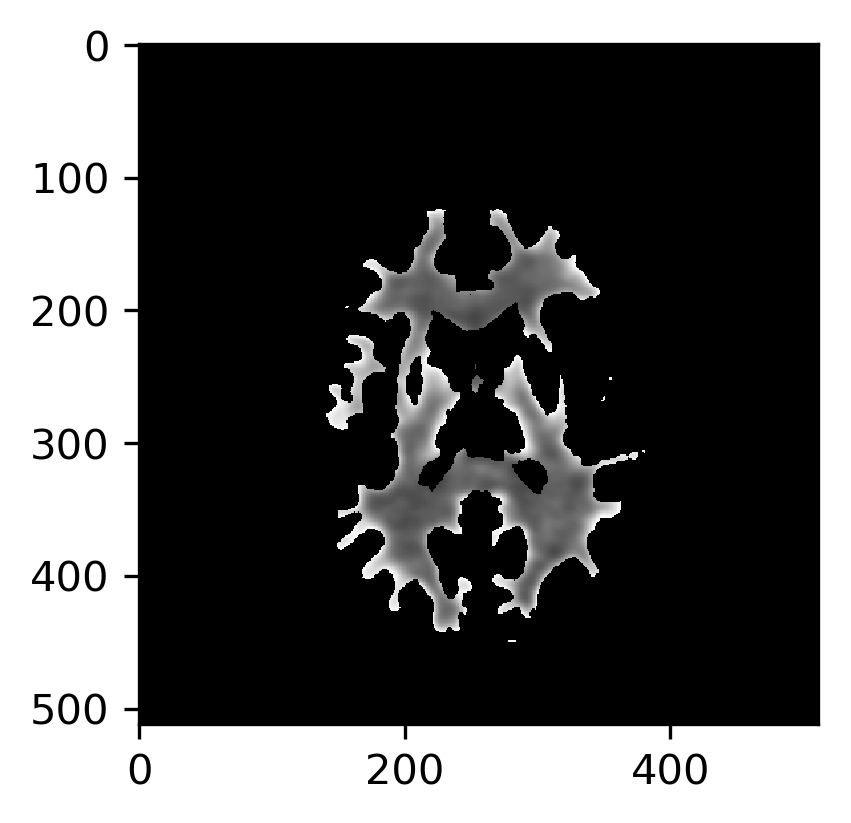

In [210]:
plt.figure(figsize=(3,3), dpi=300)
plt.imshow(np.rot90(X[0, :, :, 0]*X[0, :, :, 3]), cmap='gray')